In [39]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("FrozenLake-v1",desc= None,map_name = "8x8",is_slippery = True)
env.reset()
env.render()

#  S -> Start 
#  F -> Frozen Region
#  H -> Hole
#  G -> Goal

# Game starts at S and stops at H or G.And target is to reach G in minimum steps. 


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [40]:
State_space = env.observation_space
print(State_space)

Discrete(64)


In [41]:
Action_space = env.action_space

# 0 -> Left
# 1 -> Down
# 2 -> Right
# 3 -> UP
print(Action_space)

Discrete(4)


In [42]:
def beh_policy(env,state,Q_table,ϵ):
    if np.random.uniform() -ϵ < 1e-6:
        return env.action_space.sample()
    else :
        return np.argmax(Q_table[state])

In [43]:
def Q_learning (env,η,γ,ϵ,ϵ_min,total_eps):     
 
 State_space = env.observation_space

 Action_space = env.action_space

 # Q - Learning Training Phase

 # Initialise the Q table

 
 Q = np.zeros((State_space.n,Action_space.n))

 episode_list = []

 time_steps_list = []

 reward_list = []
 
 avg_rew_list = []
 
 avg_time_step = []

 for episode in range(1,total_eps+1):
    
    curr_state = env.reset() # resets to start position.
    
  
    success = False
    total_reward = 0
    time_steps = 0
    while time_steps >= 0 :
     
     time_steps  += 1
     
     action = beh_policy(env,curr_state,Q,ϵ) # Action is picked using ϵ - greedy policy.
    
     new_state,reward,success,info = env.step(action) # Action is performed
     
     total_reward += reward
     
     if reward == -0.01 : 
       
      old_value = Q[curr_state,action]    
     
      Q[curr_state,action] = old_value + η*(reward + γ*(np.max(Q[new_state])) - old_value) # Q value update step
      
      curr_state = new_state
     
     else :
      
      Q[curr_state,action] = reward # If reaches terminal state.
      
      break       
         
    reward_list.append(total_reward)
    
    if reward == 1.0 :
        episode_list.append(episode)
        time_steps_list.append(time_steps)
    
    if episode % (total_eps/50) == 0 :    
        avg_rew_list.append(np.mean(reward_list))
        avg_time_step.append(np.mean(time_steps_list))
        time_steps_list = []
        reward_list = []
    
    ϵ -= (ϵ - ϵ_min)*(episode)/total_eps # ϵ decays to ϵ_min as the agent trained.
    
 
 π = [np.argmax(Q[state]) for state in range(State_space.n)] # The policy designed by Q learning.

 
 return π,episode_list,avg_time_step,avg_rew_list 

In [67]:
total_eps = 5000 # Total no. of episodes to be trained

η = 0.3 # Learning rate.

γ = 0.8 # Discount factor

ϵ = 0.9 # Prob to explore
ϵ_min = 0.1 # minimum epsilon as it decays.

π_Q,epi_list_train,avg_time_train,avg_rew_train = Q_learning(env,η,γ,ϵ,ϵ_min,total_eps)

In [45]:
print("No.of times agent reached the goal in training phase :",len(epi_list_train))

No.of times agent reached the goal in training phase : 1615


In [46]:
# Testing the Agent for 'test_eps' episodes. 

def test_agent(π,test_eps,env):
 
 episode_list = []
 
 time_steps_list = []

 reward_list = [] 

 avg_rew_list = []
    
 avg_time_step = []

 for episode in range(1,test_eps+1):
    curr_state = env.reset()
    time_steps = 0
    reward = -0.01
    total_reward = 0
    while reward == -0.01 :
        
        time_steps+=1
        
        action = π[curr_state]
        
        new_state,reward,success,info = env.step(int(action))
        
        curr_state = new_state
        
        total_reward += reward
    
    reward_list.append(total_reward)    
    
    if reward == 1 :
        episode_list.append(episode)
        time_steps_list.append(time_steps)
        
    if episode % (test_eps/50) == 0 :    
        avg_rew_list.append(np.mean(reward_list))
        avg_time_step.append(np.mean(time_steps_list))
        time_steps_list = []
        reward_list = []
    
 
 return episode_list,avg_time_step,avg_rew_list

In [47]:
test_eps = 2000

epi_list_test_Q,avg_time_test_Q,avg_rew_test_Q = test_agent(π_Q,test_eps,env)

In [48]:
print("Success percentage of agent in testing phase :",len(epi_list_test_Q)*100/test_eps)

Success percentage of agent in testing phase : 56.2


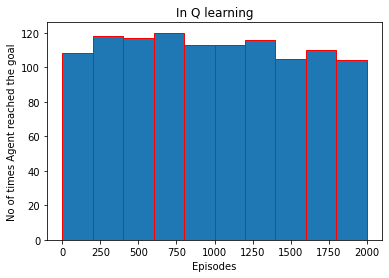

In [49]:
plt.hist(epi_list_test_Q,bins = 10,range = (1,test_eps),edgecolor = 'red')
plt.xlabel("Episodes")
plt.ylabel("No of times Agent reached the goal")
plt.title("In Q learning")
plt.savefig("Figs/hist_Q_slippy.png")
plt.show()

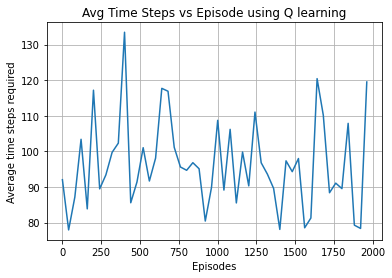

In [50]:
plt.grid()
plt.plot(np.arange(1,test_eps,test_eps/50),avg_time_test_Q)
plt.xlabel("Episodes")
plt.ylabel("Average time steps required")
plt.title("Avg Time Steps vs Episode using Q learning")
plt.savefig("Figs/Avg_time_Q_slippy.png")
plt.show()

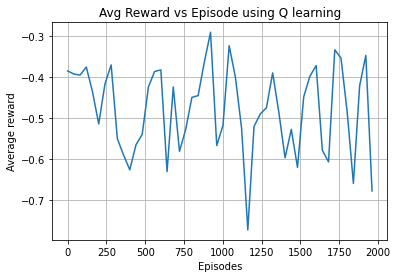

In [51]:
plt.grid()
plt.plot(np.arange(1,test_eps,test_eps/50),avg_rew_test_Q)
plt.xlabel("Episodes")
plt.ylabel("Average reward")
plt.title("Avg Reward vs Episode using Q learning")

plt.savefig("Figs/Avg_rew_Q_slippy.png")
plt.show()

In [52]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)

In [78]:
# Visualising the agent game play for policy generated by Q learning Algorithm.

# Likely to reach the goal.
success = False
curr_state = env.reset()
time_step = 0
frames_Q = []
reward = -0.01
while reward == -0.01:
    time_step+=1
    
    action = π_Q[curr_state]
    
    new_state,reward,success,info = env.step(int(action))
    
    curr_state = new_state
    
    frames_Q.append({
        'frame': env.render(mode='ansi'),
        'state': new_state,
        'action': action,
        'reward': reward
        }
    )


In [79]:
print_frames(frames_Q)

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

Timestep: 197
State: 63
Action: 2
Reward: 1.0


In [55]:
# Solving with Value Iteration.

In [56]:
# 0 -> Left
# 1 -> Down
# 2 -> Right
# 3 -> Up

transition_model = env.P # Gives the transistion table of environment.

# poss_rew takes curr state, curr action, next state and returns the reward recieved.
def poss_rew(state,action,next_state):
    for transition_data in transition_model[state][action]:
     
     if next_state == transition_data[1]:
        return transition_data[2]

# Poss_state takes curr state ,action as arguments and returns list of possible next states.  
def poss_state(state,action):
    lst = []
    for transition_data in transition_model[state][action]:
        lst.append(transition_data[1])
    return lst

# Transistion to intended state is equi probable with the perpendicular states. 

In [68]:
# Value Iteration

# Initialisation

V = np.zeros(State_space.n)

δ = 1 

γ = 0.8 # Discount Factor.

while δ > 1e-9 :
    V_prev = V
    max_val = []
    for state in range(len(V)):
        value_ac = [] 
        for action in range(Action_space.n):
          
         prob = 1/3 
         
         next_state = poss_state(state,action)
         
         value_ac.append(prob*(sum([poss_rew(state,action,i) + γ*V_prev[i] for i in next_state])))
            
        max_val.append(max(value_ac))
    V = np.array(max_val)    
        
    δ = np.linalg.norm(V_prev - V,1) # L_1 norm of difference of prev and curr value functions.
    

In [69]:
π_val = np.zeros(State_space.n) # Policy designed by value iteration.

for state in range(len(V)):
        value_ac = []
        for action in range(Action_space.n):
         
         prob = 1/3
         
         next_state = poss_state(state,action)
         
         value_ac.append(prob*(np.sum([poss_rew(state,action,i) + γ*V[i] for i in next_state])))
        value_ac  = np.array(value_ac)    
        π_val[state] = np.argmax(value_ac) # Picking the action for a state where we have max value.

In [70]:
print("Policy designed by value iteration",π_val)

print("Policy designed by Q learning algo",π_Q)

Policy designed by value iteration [3. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 2. 2. 1. 0. 0. 0. 0. 2. 3. 2. 1.
 0. 0. 0. 1. 0. 0. 2. 1. 0. 3. 0. 0. 2. 1. 3. 2. 0. 0. 0. 1. 3. 0. 0. 2.
 0. 0. 1. 0. 0. 2. 0. 2. 0. 1. 0. 0. 1. 1. 1. 0.]
Policy designed by Q learning algo [3, 2, 1, 2, 2, 1, 2, 0, 1, 3, 3, 3, 3, 3, 1, 2, 0, 0, 0, 0, 2, 3, 2, 0, 0, 0, 3, 0, 0, 0, 2, 1, 0, 3, 0, 0, 2, 1, 3, 1, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0]


In [71]:
# Testing the policy designed by value iteration

epi_list_test_val,avg_time_test_val,avg_rew_test_val = test_agent(π_val,test_eps,env)

In [72]:
print("Success percentage of agent using Value iteration:",len(epi_list_test_val)*100/test_eps)

Success percentage of agent using Value iteration: 79.15


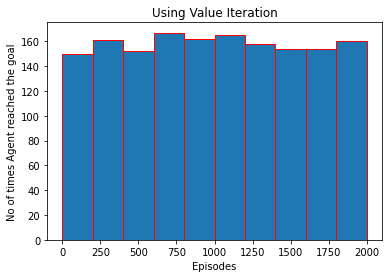

In [73]:

plt.hist(epi_list_test_val,bins = 10,range = (1,test_eps),edgecolor = 'red')
plt.xlabel("Episodes")
plt.ylabel("No of times Agent reached the goal")
plt.title("Using Value Iteration")
plt.savefig("Figs/hist_val_slippy.png")
plt.show()

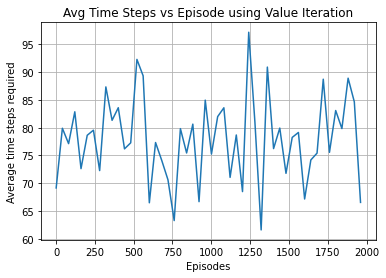

In [74]:

plt.grid()
plt.plot(np.arange(1,test_eps,test_eps/50),avg_time_test_val)
plt.xlabel("Episodes")
plt.ylabel("Average time steps required")
plt.title("Avg Time Steps vs Episode using Value Iteration")
plt.savefig("Figs/Avg_time_val_slippy.png")
plt.show()

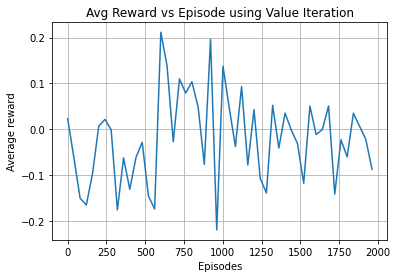

In [75]:

plt.grid()
plt.plot(np.arange(1,test_eps,test_eps/50),avg_rew_test_val)
plt.xlabel("Episodes")
plt.ylabel("Average reward")
plt.title("Avg Reward vs Episode using Value Iteration")

plt.savefig("Figs/Avg_rew_val_slippy.png")
plt.show()

In [76]:
# Visualising the agent game play for policy generated by Value Iteration

# Most likely to reach the goal.
success = False
curr_state = env.reset()
time_step = 0
frames_val = []
reward = -0.01
while reward == -0.01 :
    time_step+=1
    
    action = π_val[curr_state]
    
    new_state,reward,success,info = env.step(int(action))
    
    curr_state = new_state
    
    frames_val.append({
        'frame': env.render(mode='ansi'),
        'state': new_state,
        'action': action,
        'reward': reward
        }
    )

In [77]:
print_frames(frames_val)

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

Timestep: 119
State: 63
Action: 2.0
Reward: 1.0
